### Code to generate the data:
python -m grid --n 4 interface "python SVC.py --dataset interface --dist normal --test 1 --pte 10000 --kernel laplace --sigma 100" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 8 10 20 30 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

python -m grid --n 4 stripe "python SVC.py --dataset stripe --dist normal --test 1 --pte 10000 --kernel laplace --sigma 100" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 8 10 20 30 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

python -m grid --n 4 sphere "python SVC.py --dataset sphere --dist normal --test 1 --pte 10000 --kernel laplace --sigma 100" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 8 10 20 30 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


#### figures for $\alpha$

In [2]:
datasets = ["interface", "sphere", "stripe"]
data = dict()
for dataset in datasets:
    ds = utils.get_argument(dataset, "d")
    for d in ds:
        dic = {"d": d}
        data_ = utils.get_alpha(dataset, dic)
        data[dataset, d] = utils.class_data(data_, dic, "ptr")

/home/jonas/local/py3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


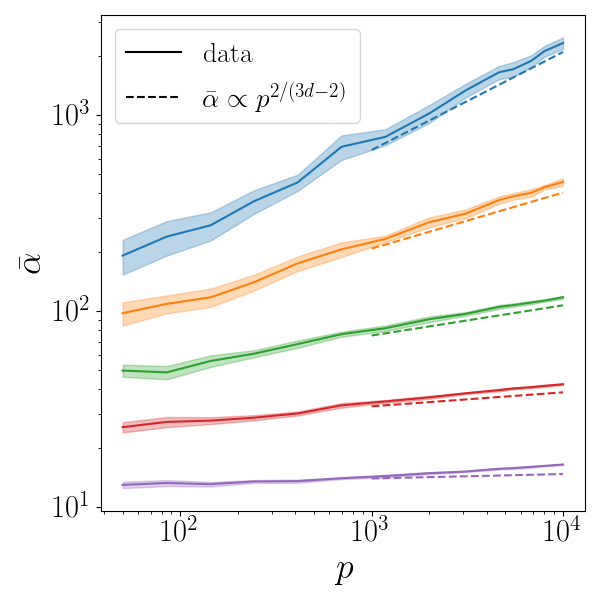

In [3]:
%matplotlib notebook

dataset = "interface" # interface, stripe, sphere

#ds = get_argument(dataset, "d")
ds = [2, 3, 5, 10 , 30]

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\bar\alpha \propto p^{2 / (3d-2)}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

if dataset == "interface":
    pf = {2: 21, 3: 29, 5: 26, 8: 23, 10: 20, 20: 15, 30: 12}
if dataset == "stripe":
    pf = {2: 18, 3: 27, 5: 26, 8: 22.5, 10: 21, 20: 16, 30: 15}
if dataset == "sphere":
    pf = {2: 18, 3: 26, 5: 25, 8: 22, 10: 20, 20: 15.5, 30: 12.5}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data[dataset, d])
    ps, stds = utils.get_std(data[dataset, d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    # benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d] * x ** (2 / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=26)
ax.set_ylabel(r"$\bar\alpha$", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)

plt.legend(handles=label1, loc="upper left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

<IPython.core.display.Javascript object>


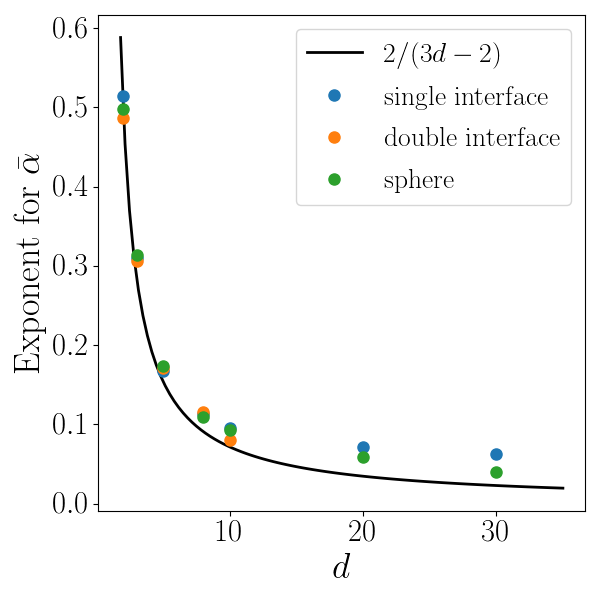

In [27]:
%matplotlib notebook

datasets = ["interface", "stripe", "sphere"]

imin = {
    "interface":{2: 6, 3: 6, 5: 6, 8: 6, 10: 6, 20: 6, 30: 6},
    "sphere": {2: 4, 3: 4, 5: 4, 8: 4, 10: 4, 20: 4, 30: 4},
    "stripe": {2: 6, 3: 6, 5: 6, 8: 8, 10: 8, 20: None, 30: None}
}
beta = dict()
for dataset in datasets:
    beta[dataset] = list()
    ds = utils.get_argument(dataset, "d")
    for d in ds:
        ps, means = utils.get_mean(data[dataset, d])
        _imin = imin[dataset][d]
        _beta = np.polyfit(np.log10(ps[_imin:]), np.log10(means[_imin:]), 1)[0] if _imin is not None else np.nan
        beta[dataset].append(_beta)

labels = [Line2D([0], [0], c='k', ls='-', lw=2, label=r"$2/(3d-2)$"),
          Line2D([0], [0], c='C0', ls='None', marker='o', ms=8, label=r"single interface"),
          Line2D([0], [0], c='C1', ls='None', marker='o', ms=8, label=r"double interface"),
          Line2D([0], [0], c='C2', ls='None', marker='o', ms=8, label=r"sphere")]

fig, ax = plt.subplots(figsize=(6, 6))

#benchmark
x = np.linspace(1.8, 35, 100)
y = 2 / (3 * x - 2)
ax.plot(x, y, ls='-', lw=2, c='k')
#data
for i, dataset in enumerate(datasets):
    dic = {"dataset": dataset}
    ds = utils.get_argument(dataset, "d", dic)
    ax.plot(ds, beta[dataset], marker='o', ms=8, ls='None', c=r"C{}".format(i))

ax.set_xlabel(r"$d$", fontsize=26)
ax.set_ylabel(r"Exponent for $\bar\alpha$", fontsize=26)
ax.set(xscale='linear', yscale='linear')
ax.tick_params(labelsize=22)

plt.legend(handles=labels, loc="upper right", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

#### figures for $\Delta$

In [28]:
datasets = ["interface", "sphere", "stripe"]
data = dict()
for dataset in datasets:
    ds = utils.get_argument(dataset, "d")
    for d in ds:
        dic = {"d": d}
        data_ = utils.get_Delta(dataset, dic)
        data[dataset, d] = utils.class_data(data_, dic, "ptr")

/home/jonas/local/py3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


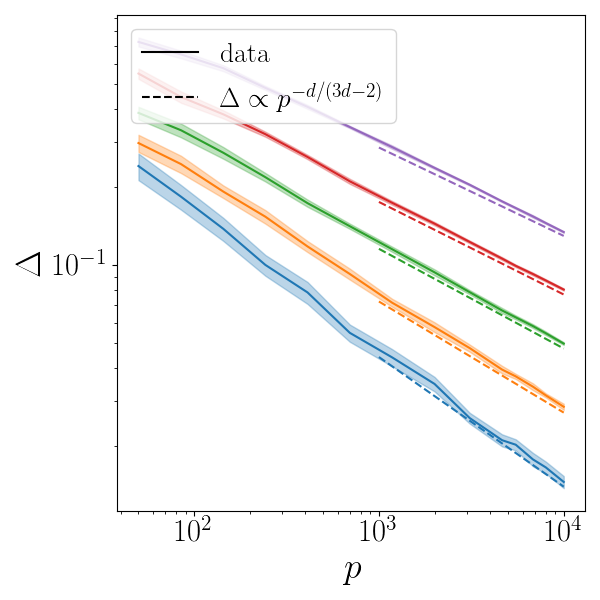

In [29]:
%matplotlib notebook

dataset = "interface" # interface, stripe, sphere

#ds = get_argument(dataset, "d")
ds = [2, 3, 5, 10 , 30]

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\Delta \propto p^{-d / (3d-2)}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

if dataset == "interface":
    pf = {2: 1.4, 3: 1.4, 5: 1.65, 8: 1.93, 10: 2.07, 20: 2.6, 30: 3.}
if dataset == "stripe":
    pf = {2: 2.1, 3: 2.3, 5: 3.2, 8: 4.5, 10: 5.2, 20: 7.1, 30: 7.7}
if dataset == "sphere":
    pf = {2: 1.3, 3: 1.5, 5: 1.8, 8: 2.1, 10: 2.25, 20: 2.8, 30: 3.2}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data[dataset, d])
    ps, stds = utils.get_std(data[dataset, d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    # benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d] * x ** (-d / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=26)
ax.set_ylabel(r"$\Delta$", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)

plt.legend(handles=label1, loc="upper left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

<IPython.core.display.Javascript object>


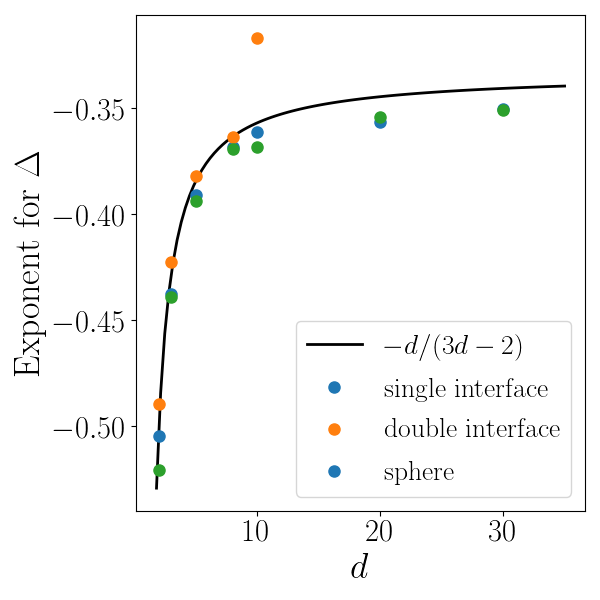

In [30]:
%matplotlib notebook

datasets = ["interface", "stripe", "sphere"]

imin = {
    "interface":{2: 5, 3: 5, 5: 5, 8: 5, 10: 5, 20: 5, 30: 5},
    "sphere": {2: 8, 3: 6, 5: 6, 8: 6, 10: 6, 20: 7, 30: 7},
    "stripe": {2: 6, 3: 6, 5: 8, 8: 9, 10: 9, 20: None, 30: None}
}
beta = dict()
for dataset in datasets:
    beta[dataset] = list()
    ds = utils.get_argument(dataset, "d")
    for d in ds:
        ps, means = utils.get_mean(data[dataset, d])
        _imin = imin[dataset][d]
        _beta = np.polyfit(np.log10(ps[_imin:]), np.log10(means[_imin:]), 1)[0] if _imin is not None else np.nan
        beta[dataset].append(_beta)

labels = [Line2D([0], [0], c='k', ls='-', lw=2, label=r"$-d/(3d-2)$"),
          Line2D([0], [0], c='C0', ls='None', marker='o', ms=8, label=r"single interface"),
          Line2D([0], [0], c='C1', ls='None', marker='o', ms=8, label=r"double interface"),
          Line2D([0], [0], c='C0', ls='None', marker='o', ms=8, label=r"sphere")]

fig, ax = plt.subplots(figsize=(6, 6))

#benchmark
x = np.linspace(1.8, 35, 100)
y = -x / (3 * x - 2)
ax.plot(x, y, ls='-', lw=2, c='k')
#data
for i, dataset in enumerate(datasets):
    dic = {"dataset": dataset}
    ds = utils.get_argument(dataset, "d", dic)
    ax.plot(ds, beta[dataset], marker='o', ms=8, ls='None', c=r"C{}".format(i))

ax.set_xlabel(r"$d$", fontsize=26)
ax.set_ylabel(r"Exponent for $\Delta$", fontsize=26)
ax.set(xscale='linear', yscale='linear')
ax.tick_params(labelsize=22)

plt.legend(handles=labels, loc="lower right", fontsize=20)
plt.tight_layout()
plt.savefig("path_to_figure", format="pdf")

#### figures for $\epsilon$

In [31]:
datasets = ["interface", "sphere", "stripe"]
data = dict()
for dataset in datasets:
    ds = utils.get_argument(dataset, "d")
    for d in ds:
        dic = {"d": d}
        data_ = utils.get_test_error(dataset, dic)
        data[dataset, d] = utils.class_data(data_, dic, "ptr")

/home/jonas/local/py3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


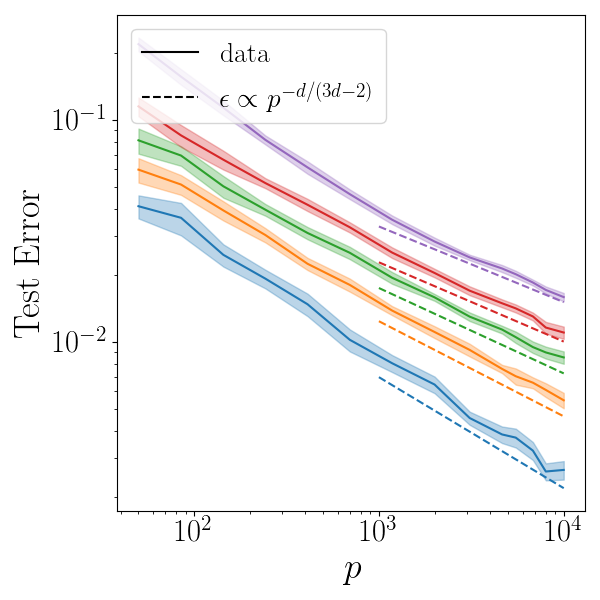

In [32]:
%matplotlib notebook

dataset = "interface" # interface, stripe, sphere

#ds = get_argument(dataset, "d")
ds = [2, 3, 5, 10 , 30]

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\epsilon \propto p^{-d / (3d-2)}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

if dataset == "interface":
    pf = {2: .22, 3: .24, 5: .25, 8: .28, 10: .27, 20: .3, 30: .35}
if dataset == "stripe":
    pf = {2: 0.48, 3: 0.55, 5: 0.65, 8: 0.75, 10: 0.85, 20: 1.55, 30: 2.25}
if dataset == "sphere":
    pf = {2: .35, 3: .45, 5: .43, 8: .43, 10: .44, 20: .48, 30: .53}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data[dataset, d])
    ps, stds = utils.get_std(data[dataset, d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    # benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d] * x ** (-d / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=26)
ax.set_ylabel(r"Test Error", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)

plt.legend(handles=label1, loc="upper left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")